In [16]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib ipympl
import matplotlib.patches as mpatches
import seaborn as sns
from statistics import mean
import warnings


In [3]:
# Get data
df_d2011 = pd.read_csv("day.csv") 
df_h2011 = pd.read_csv("hour.csv")

# Working with the data
df_d2011 = df_d2011.round(2)
df_h2011 = df_h2011.round({"atemp" : 2})

df_d2011.loc[df_d2011['holiday'] == 0, 'holiday'] = 'No'
df_d2011.loc[df_d2011['holiday'] == 1, 'holiday'] = 'Yes'

df_d2011.loc[df_d2011['workingday'] == 0, 'workingday'] = 'No'
df_d2011.loc[df_d2011['workingday'] == 1, 'workingday'] = 'Yes'

df_d2011.loc[df_d2011['season'] == 1, 'season'] = 'Winter'
df_d2011.loc[df_d2011['season'] == 2, 'season'] = 'Spring'
df_d2011.loc[df_d2011['season'] == 3, 'season'] = 'Summer'
df_d2011.loc[df_d2011['season'] == 4, 'season'] = 'Fall'

df_d2011.loc[df_d2011['mnth'] == 1, 'mnth'] = 'Januar'
df_d2011.loc[df_d2011['mnth'] == 2, 'mnth'] = 'Februar'
df_d2011.loc[df_d2011['mnth'] == 3, 'mnth'] = 'March'
df_d2011.loc[df_d2011['mnth'] == 4, 'mnth'] = 'April'
df_d2011.loc[df_d2011['mnth'] == 5, 'mnth'] = 'May'
df_d2011.loc[df_d2011['mnth'] == 6, 'mnth'] = 'June'
df_d2011.loc[df_d2011['mnth'] == 7, 'mnth'] = 'July'
df_d2011.loc[df_d2011['mnth'] == 8, 'mnth'] = 'August'
df_d2011.loc[df_d2011['mnth'] == 9, 'mnth'] = 'September'
df_d2011.loc[df_d2011['mnth'] == 10, 'mnth'] = 'October'
df_d2011.loc[df_d2011['mnth'] == 11, 'mnth'] = 'November'
df_d2011.loc[df_d2011['mnth'] == 12, 'mnth'] = 'December'

df_d2011.loc[df_h2011['weathersit'] == 1, 'weathersit'] = 'Clear'
df_d2011.loc[df_h2011['weathersit'] == 2, 'weathersit'] = 'Misty'
df_d2011.loc[df_h2011['weathersit'] == 3, 'weathersit'] = 'Rain'
df_d2011.loc[df_h2011['weathersit'] == 4, 'weathersit'] = 'Storm'

df_d2011.loc[df_d2011['weekday'] == 0, 'weekday'] = 'Sunday'
df_d2011.loc[df_d2011['weekday'] == 1, 'weekday'] = 'Monday'
df_d2011.loc[df_d2011['weekday'] == 2, 'weekday'] = 'Tuesday'
df_d2011.loc[df_d2011['weekday'] == 3, 'weekday'] = 'Wednesday'
df_d2011.loc[df_d2011['weekday'] == 4, 'weekday'] = 'Thursday'
df_d2011.loc[df_d2011['weekday'] == 5, 'weekday'] = 'Friday'
df_d2011.loc[df_d2011['weekday'] == 6, 'weekday'] = 'Saturday'

df_d2011['temp'] = (df_d2011['temp'] * 47) - 8
df_d2011['atemp'] = (df_d2011['atemp'] * 66) - 16
df_d2011['hum'] = (df_d2011['hum'] * 100) 
df_d2011['windspeed'] = (df_d2011['windspeed'] * 67) 

df_d2011.loc[df_d2011['yr'] == 0, 'yr'] = '2011'
df_d2011.loc[df_d2011['yr'] == 1, 'yr'] = '2012'

# __________________________________________________________________
df_h2011.loc[df_h2011['holiday'] == 0, 'holiday'] = 'No'
df_h2011.loc[df_h2011['holiday'] == 1, 'holiday'] = 'Yes'

df_h2011.loc[df_h2011['workingday'] == 0, 'workingday'] = 'No'
df_h2011.loc[df_h2011['workingday'] == 1, 'workingday'] = 'Yes'

df_h2011.loc[df_h2011['season'] == 1, 'season'] = 'Winter'
df_h2011.loc[df_h2011['season'] == 2, 'season'] = 'Spring'
df_h2011.loc[df_h2011['season'] == 3, 'season'] = 'Summer'
df_h2011.loc[df_h2011['season'] == 4, 'season'] = 'Fall'

df_h2011['season'] = pd.Categorical(df_h2011['season'], categories=['Winter', 'Spring', 'Summer', 'Fall'])

df_h2011.loc[df_h2011['mnth'] == 1, 'mnth'] = 'Januar'
df_h2011.loc[df_h2011['mnth'] == 2, 'mnth'] = 'Februar'
df_h2011.loc[df_h2011['mnth'] == 3, 'mnth'] = 'March'
df_h2011.loc[df_h2011['mnth'] == 4, 'mnth'] = 'April'
df_h2011.loc[df_h2011['mnth'] == 5, 'mnth'] = 'May'
df_h2011.loc[df_h2011['mnth'] == 6, 'mnth'] = 'June'
df_h2011.loc[df_h2011['mnth'] == 7, 'mnth'] = 'July'
df_h2011.loc[df_h2011['mnth'] == 8, 'mnth'] = 'August'
df_h2011.loc[df_h2011['mnth'] == 9, 'mnth'] = 'September'
df_h2011.loc[df_h2011['mnth'] == 10, 'mnth'] = 'October'
df_h2011.loc[df_h2011['mnth'] == 11, 'mnth'] = 'November'
df_h2011.loc[df_h2011['mnth'] == 12, 'mnth'] = 'December'

df_h2011.loc[df_h2011['weathersit'] == 1, 'weathersit'] = 'Clear'
df_h2011.loc[df_h2011['weathersit'] == 2, 'weathersit'] = 'Misty'
df_h2011.loc[df_h2011['weathersit'] == 3, 'weathersit'] = 'Rain'
df_h2011.loc[df_h2011['weathersit'] == 4, 'weathersit'] = 'Storm'

df_h2011.loc[df_h2011['weekday'] == 0, 'weekday'] = 'Sunday'
df_h2011.loc[df_h2011['weekday'] == 1, 'weekday'] = 'Monday'
df_h2011.loc[df_h2011['weekday'] == 2, 'weekday'] = 'Tuesday'
df_h2011.loc[df_h2011['weekday'] == 3, 'weekday'] = 'Wednesday'
df_h2011.loc[df_h2011['weekday'] == 4, 'weekday'] = 'Thursday'
df_h2011.loc[df_h2011['weekday'] == 5, 'weekday'] = 'Friday'
df_h2011.loc[df_h2011['weekday'] == 6, 'weekday'] = 'Saturday'

df_h2011['weekday'] = pd.Categorical(df_h2011['weekday'], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])


df_h2011['temp'] = (df_h2011['temp'] * 47) - 8
df_h2011['atemp'] = (df_h2011['atemp'] * 66) - 16
df_h2011['hum'] = (df_h2011['hum'] * 100) 
df_h2011['windspeed'] = (df_h2011['windspeed'] * 67) 

df_h2011.loc[df_h2011['yr'] == 0, 'yr'] = '2011'
df_h2011.loc[df_h2011['yr'] == 1, 'yr'] = '2012'

# Show data
display (df_d2011.head(10), df_h2011.head(28))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Januar,No,Saturday,No,Clear,7.98,7.76,81.0,10.72,331,654,985
1,2,2011-01-02,Winter,2011,Januar,No,Sunday,No,Clear,8.92,7.10,70.0,16.75,131,670,801
2,3,2011-01-03,Winter,2011,Januar,No,Monday,Yes,Clear,1.40,-3.46,44.0,16.75,120,1229,1349
3,4,2011-01-04,Winter,2011,Januar,No,Tuesday,Yes,Clear,1.40,-2.14,59.0,10.72,108,1454,1562
4,5,2011-01-05,Winter,2011,Januar,No,Wednesday,Yes,Clear,2.81,-0.82,44.0,12.73,82,1518,1600
5,6,2011-01-06,Winter,2011,Januar,No,Thursday,Yes,Misty,1.40,-0.82,52.0,6.03,88,1518,1606
6,7,2011-01-07,Winter,2011,Januar,No,Friday,Yes,Clear,1.40,-2.14,50.0,11.39,148,1362,1510
7,8,2011-01-08,Winter,2011,Januar,No,Saturday,No,Clear,-0.48,-5.44,54.0,18.09,68,891,959
8,9,2011-01-09,Winter,2011,Januar,No,Sunday,No,Clear,-1.42,-8.08,43.0,24.12,54,768,822
9,10,2011-01-10,Winter,2011,Januar,No,Monday,Yes,Clear,-0.95,-6.10,48.0,14.74,41,1280,1321


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Januar,0,No,Saturday,No,Clear,3.28,3.14,81.0,0.0000,3,13,16
1,2,2011-01-01,Winter,2011,Januar,1,No,Saturday,No,Clear,2.34,1.82,80.0,0.0000,8,32,40
2,3,2011-01-01,Winter,2011,Januar,2,No,Saturday,No,Clear,2.34,1.82,80.0,0.0000,5,27,32
3,4,2011-01-01,Winter,2011,Januar,3,No,Saturday,No,Clear,3.28,3.14,75.0,0.0000,3,10,13
4,5,2011-01-01,Winter,2011,Januar,4,No,Saturday,No,Clear,3.28,3.14,75.0,0.0000,0,1,1
5,6,2011-01-01,Winter,2011,Januar,5,No,Saturday,No,Misty,3.28,1.16,75.0,6.0032,0,1,1
6,7,2011-01-01,Winter,2011,Januar,6,No,Saturday,No,Clear,2.34,1.82,80.0,0.0000,2,0,2
7,8,2011-01-01,Winter,2011,Januar,7,No,Saturday,No,Clear,1.40,1.16,86.0,0.0000,1,2,3
8,9,2011-01-01,Winter,2011,Januar,8,No,Saturday,No,Clear,3.28,3.14,75.0,0.0000,1,7,8
9,10,2011-01-01,Winter,2011,Januar,9,No,Saturday,No,Clear,7.04,7.10,76.0,0.0000,8,6,14


In [4]:
# convert to datetime

t= df_h2011['hr']
df_h2011['hr'] = pd.to_datetime(t, format='%H').dt.time

d = df_h2011['dteday']
df_h2011['dteday'] = pd.to_datetime(d)

#Combine time and date into one column
df_h2011['dteday'] = df_h2011.apply(lambda r : pd.datetime.combine(r['dteday'],r['hr']),1)
#_________________________________________________

df_d2011["dteday"] = pd.to_datetime(df_d2011["dteday"])


display (df_d2011.info(), df_d2011.isna().sum(),df_d2011.head())
display (df_h2011.info(), df_h2011.isna().sum(),df_h2011.head())


/var/folders/s5/1203q68j6lqgl604z3g6p36w0000gn/T/ipykernel_13096/3426207208.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_h2011['dteday'] = df_h2011.apply(lambda r : pd.datetime.combine(r['dteday'],r['hr']),1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

None

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Januar,No,Saturday,No,Clear,7.98,7.76,81.0,10.72,331,654,985
1,2,2011-01-02,Winter,2011,Januar,No,Sunday,No,Clear,8.92,7.10,70.0,16.75,131,670,801
2,3,2011-01-03,Winter,2011,Januar,No,Monday,Yes,Clear,1.40,-3.46,44.0,16.75,120,1229,1349
3,4,2011-01-04,Winter,2011,Januar,No,Tuesday,Yes,Clear,1.40,-2.14,59.0,10.72,108,1454,1562
4,5,2011-01-05,Winter,2011,Januar,No,Wednesday,Yes,Clear,2.81,-0.82,44.0,12.73,82,1518,1600


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  object        
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

None

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,Winter,2011,Januar,00:00:00,No,Saturday,No,Clear,3.28,3.14,81.0,0.0,3,13,16
1,2,2011-01-01 01:00:00,Winter,2011,Januar,01:00:00,No,Saturday,No,Clear,2.34,1.82,80.0,0.0,8,32,40
2,3,2011-01-01 02:00:00,Winter,2011,Januar,02:00:00,No,Saturday,No,Clear,2.34,1.82,80.0,0.0,5,27,32
3,4,2011-01-01 03:00:00,Winter,2011,Januar,03:00:00,No,Saturday,No,Clear,3.28,3.14,75.0,0.0,3,10,13
4,5,2011-01-01 04:00:00,Winter,2011,Januar,04:00:00,No,Saturday,No,Clear,3.28,3.14,75.0,0.0,0,1,1


In [5]:
# Bike rental distribution per hour (season,holiday)

total_hr = df_h2011.groupby(["hr", "season"]).sum()[["cnt","registered","casual"]]
total_hl = df_h2011.groupby(["hr", "holiday"]).sum()[["cnt","registered","casual"]]
display (total_hr, total_hl)



cnt  registered  casual
hr       season                           
00:00:00 Winter   4878        4274     604
         Spring  10459        8177    2282
         Summer  13822       10729    3093
         Fall     9971        8575    1396
01:00:00 Winter   3229        2813     416
...                ...         ...     ...
22:00:00 Fall    21871       19169    2702
23:00:00 Winter   7994        7180     814
         Spring  17661       14080    3581
         Summer  22986       18247    4739
         Fall    15300       13369    1931

[96 rows x 3 columns]

cnt  registered  casual
hr       holiday                            
00:00:00 No        37923       30852    7071
         Yes        1207         903     304
01:00:00 No        23347       18829    4518
         Yes         817         626     191
02:00:00 No        15817       12570    3247
         Yes         535         370     165
03:00:00 No         7965        6131    1834
         Yes         209         150      59
04:00:00 No         4311        3473     838
         Yes         117          81      36
05:00:00 No        14038       13059     979
         Yes         223         190      33
06:00:00 No        54538       51595    2943
         Yes         594         520      74
07:00:00 No       152446      144587    7859
         Yes        1725        1547     178
08:00:00 No       257420      242155   15265
         Yes        3581        3085     496
09:00:00 No       155843      134308   21535
         Yes        3595        2672     923
10:00:00 No       121984       89699   32285
         Yes        4273        2769    1504
11:00:00 No       146101      104702   41399
         Yes        5219        3332    1887
12:00:00 No       178384      130752   47632
         Yes        6030        3944    2086
13:00:00 No       178650      128143   50507
         Yes        6269        4063    2206
14:00:00 No       169640      116739   52901
         Yes        6012        3824    2188
15:00:00 No       177581      124833   52748
         Yes        5568        3710    1858
16:00:00 No       222030      170024   52006
         Yes        5718        3890    1828
17:00:00 No       330704      278065   52639
         Yes        6156        4575    1581
18:00:00 No       304128      260894   43234
         Yes        5644        4382    1262
19:00:00 No       222132      187655   34477
         Yes        4657        3629    1028
20:00:00 No       160813      135402   25411
         Yes        3737        2770     967
21:00:00 No       122398      102587   19811
         Yes        3047        2288     759
22:00:00 No        93326       77665   15661
         Yes        2286        1747     539
23:00:00 No        62725       51867   10858
         Yes        1216        1009     207

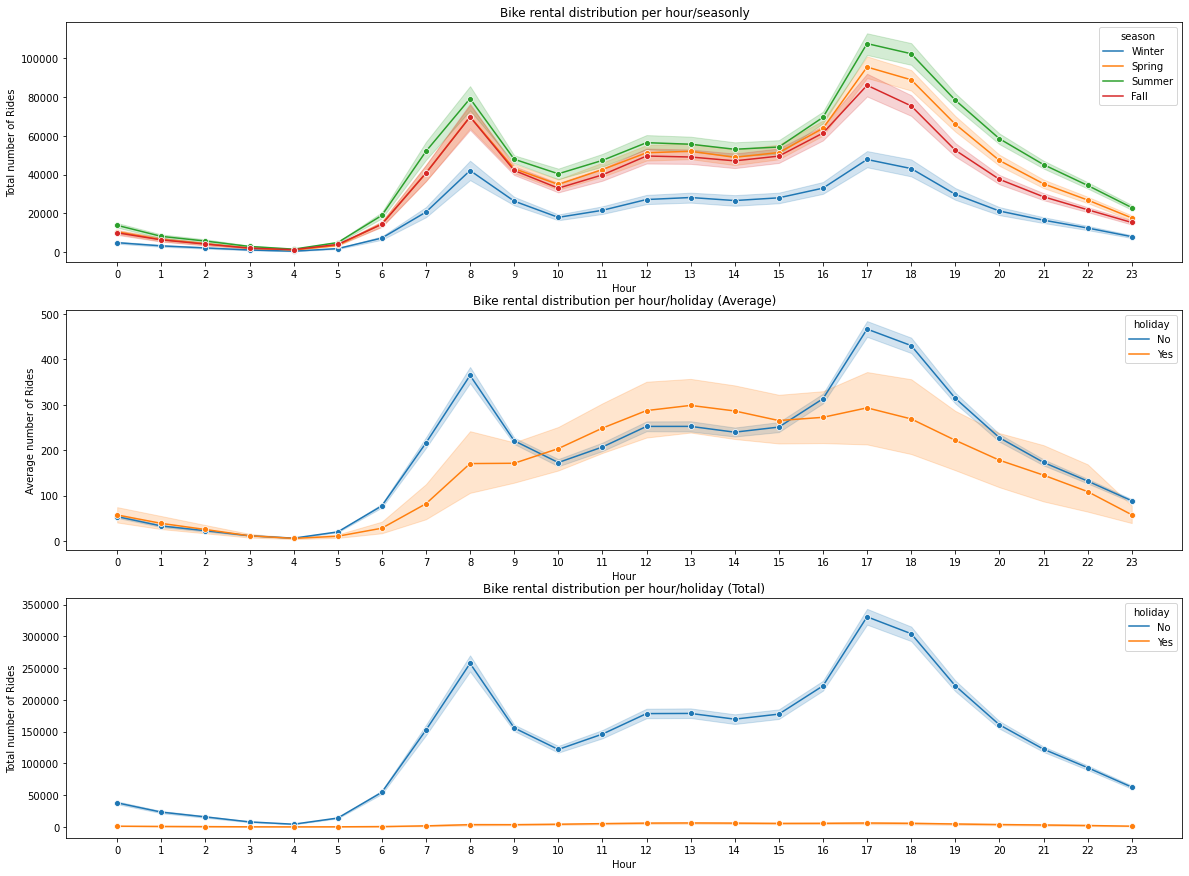

In [6]:
# Creating Plot with seaborn

fig, ax = plt.subplots(figsize=(20,15), nrows= 3, ncols=1)

sns.lineplot(x = df_h2011["dteday"].dt.hour, y = 'cnt', hue='season', data= df_h2011, estimator=sum, marker="o", ax=ax[0])
sns.lineplot(x = df_h2011["dteday"].dt.hour, y= 'cnt', hue='holiday', data= df_h2011,estimator=mean, marker="o", ax=ax[1])
sns.lineplot(x = df_h2011["dteday"].dt.hour, y= 'cnt', hue='holiday', data= df_h2011, estimator=sum, marker="o", ax=ax[2])


ax[0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0])
ax[1].set_xticks(np.arange(min(df_h2011["dteday"].dt.hour), max(df_h2011["dteday"].dt.hour) + 1, 1.0))
ax[2].set_xticks(np.arange(min(df_h2011["dteday"].dt.hour), max(df_h2011["dteday"].dt.hour) + 1, 1.0))


ax[0].set_title ('Bike rental distribution per hour/seasonly')
ax[1].set_title ('Bike rental distribution per hour/holiday (Average)')
ax[2].set_title ('Bike rental distribution per hour/holiday (Total)')

ax[0].set_ylabel('Total number of Rides')
ax[1].set_ylabel('Average number of Rides')
ax[2].set_ylabel('Total number of Rides')

ax[0].set_xlabel('Hour')
ax[1].set_xlabel('Hour')
ax[2].set_xlabel('Hour')

plt.show()


In [7]:
#order = pd.Categorical(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])                 #logscale
#.reindex(order)
total_day = df_h2011.groupby(["hr","weekday"]).sum()[["cnt","registered","casual"]]
total_day

cnt  registered  casual
hr       weekday                             
00:00:00 Monday      3571        2582     989
         Tuesday     2790        2207     583
         Wednesday   3594        2983     611
         Thursday    4045        3340     705
         Friday      5453        4491     962
...                   ...         ...     ...
23:00:00 Wednesday   8625        7370    1255
         Thursday   10062        8676    1386
         Friday     11982        9955    2027
         Saturday   12049        9368    2681
         Sunday      6499        4985    1514

[168 rows x 3 columns]

In [8]:
# Testing Weekday/Weekend

df_h2011["DayOfWeek"] = df_h2011["dteday"].dt.weekday
df_h2011["IsWeekend"] = df_h2011["DayOfWeek"] >= 5

weekday = df_h2011.loc[df_h2011["weekday"].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekend = df_h2011.loc[df_h2011["weekday"].isin(['Saturday', 'Sunday'])]

display(weekday)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,DayOfWeek,IsWeekend
47,48,2011-01-03 00:00:00,Winter,2011,Januar,00:00:00,No,Monday,Yes,Clear,2.34,-2.80,44.0,23.9994,0,5,5,0,False
48,49,2011-01-03 01:00:00,Winter,2011,Januar,01:00:00,No,Monday,Yes,Clear,1.40,-4.78,44.0,27.9993,0,2,2,0,False
49,50,2011-01-03 04:00:00,Winter,2011,Januar,04:00:00,No,Monday,Yes,Clear,-0.48,-6.76,47.0,26.0027,0,1,1,0,False
50,51,2011-01-03 05:00:00,Winter,2011,Januar,05:00:00,No,Monday,Yes,Clear,-0.48,-6.76,47.0,19.0012,0,3,3,0,False
51,52,2011-01-03 06:00:00,Winter,2011,Januar,06:00:00,No,Monday,Yes,Clear,-1.42,-8.74,50.0,26.0027,0,30,30,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31 19:00:00,Winter,2012,December,19:00:00,No,Monday,Yes,Misty,4.22,1.16,60.0,11.0014,11,108,119,0,False
17375,17376,2012-12-31 20:00:00,Winter,2012,December,20:00:00,No,Monday,Yes,Misty,4.22,1.16,60.0,11.0014,8,81,89,0,False
17376,17377,2012-12-31 21:00:00,Winter,2012,December,21:00:00,No,Monday,Yes,Clear,4.22,1.16,60.0,11.0014,7,83,90,0,False
17377,17378,2012-12-31 22:00:00,Winter,2012,December,22:00:00,No,Monday,Yes,Clear,4.22,1.82,56.0,8.9981,13,48,61,0,False


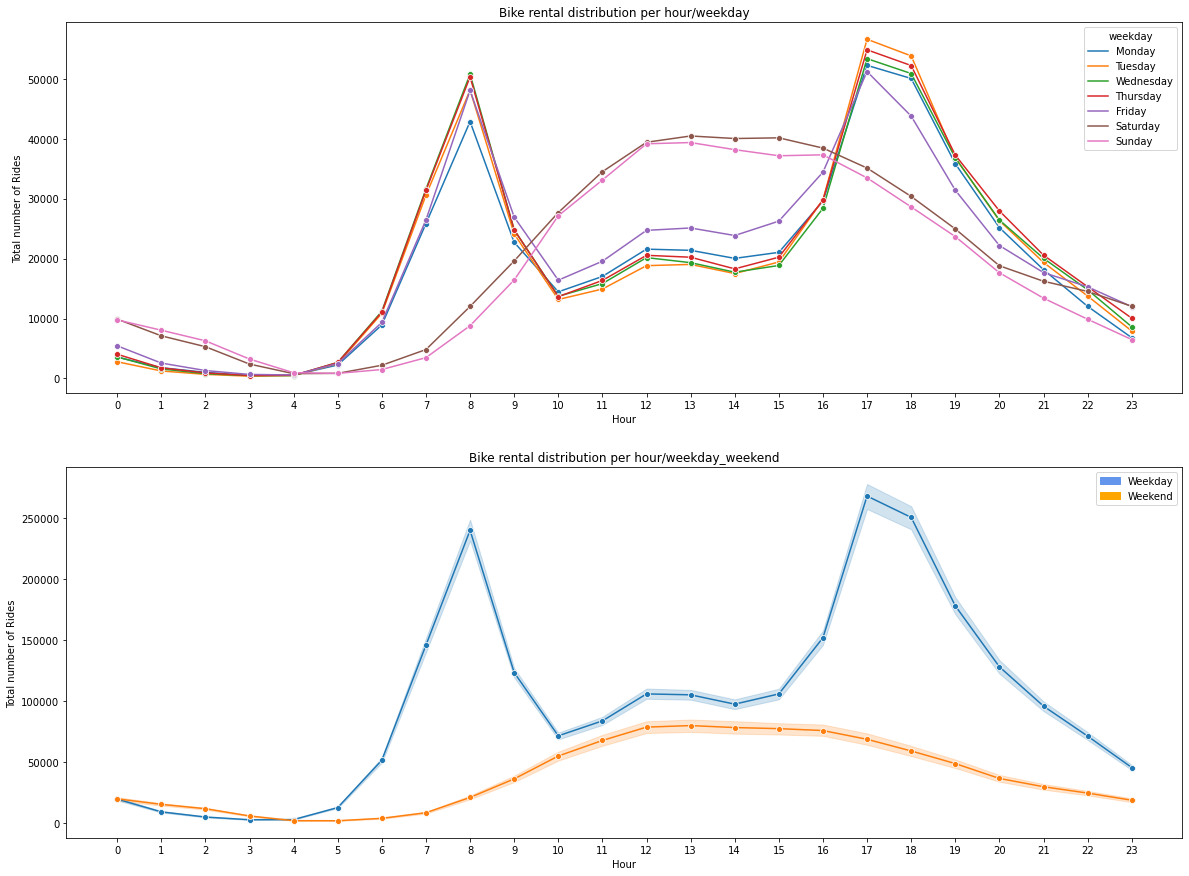

In [9]:
fig, ax = plt.subplots(figsize=(20,15), nrows= 2, ncols=1)

sns.lineplot(x = df_h2011["dteday"].dt.hour, y= 'cnt', hue="weekday", data= df_h2011, estimator=sum, marker="o", ax=ax[0], ci=None)
sns.lineplot(x = df_h2011["dteday"].dt.hour, y= 'cnt', hue="IsWeekend", data= df_h2011, estimator=sum, marker="o", ax=ax[1])

# Alternative
#sns.lineplot(x=df_h2011["dteday"].dt.hour, y='cnt', data=weekday, estimator=sum, marker="o",ax=ax[1])
#sns.lineplot(x=df_h2011["dteday"].dt.hour, y='cnt', data=weekend, estimator=sum, marker="o",ax=ax[1])

ax[0].set_xticks(np.arange(min(df_h2011["dteday"].dt.hour), max(df_h2011["dteday"].dt.hour) + 1, 1.0))
ax[1].set_xticks(np.arange(min(df_h2011["dteday"].dt.hour), max(df_h2011["dteday"].dt.hour) + 1, 1.0))

#ax[1].legend(title="Day of the week", labels=["Weekday", "Weekend"])
false = mpatches.Patch(color = "cornflowerblue" ,label='Weekday')
true = mpatches.Patch(color= "orange", label='Weekend')
ax[1].legend(handles=[false,true])

ax[0].set_title ('Bike rental distribution per hour/weekday')
ax[1].set_title ('Bike rental distribution per hour/weekday_weekend')

ax[0].set_ylabel('Total number of Rides')
ax[1].set_ylabel('Total number of Rides')

ax[0].set_xlabel('Hour')
ax[1].set_xlabel('Hour')

plt.show()

,registered,casual
weekday,,
Monday,384719,70784
Tuesday,411266,57843
Wednesday,415729,57319
Thursday,423935,61460
Friday,409552,78238
Saturday,323955,153852
Sunday,303506,140521


,registered,casual
season,,
Winter,410726,60622
Spring,715067,203522
Summer,835038,226091
Fall,711831,129782


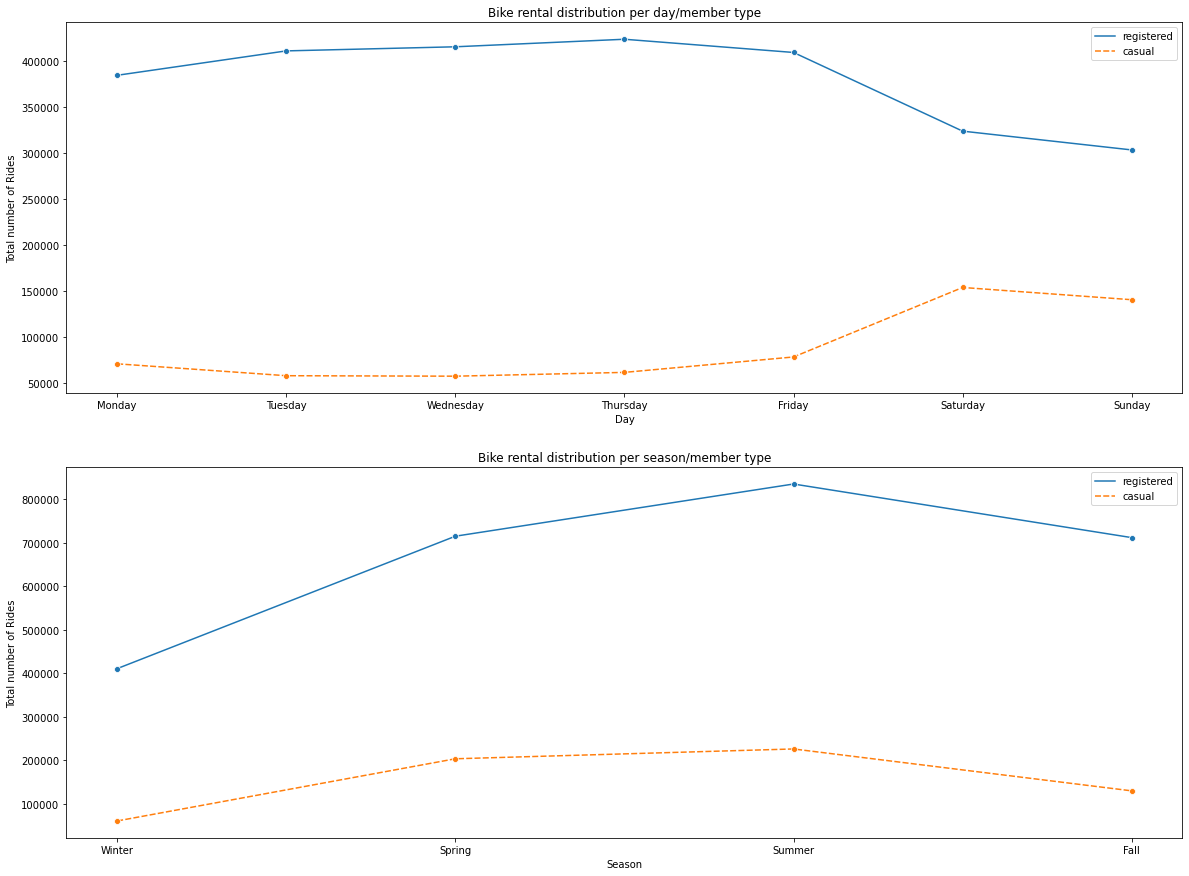

In [10]:
total_day = df_h2011.groupby(["weekday"]).sum()[["registered","casual"]]
total_hday = df_h2011.groupby(["season"]).sum()[["registered","casual"]]

display(total_day,total_hday)

fig, ax = plt.subplots(figsize=(20,15), nrows= 2, ncols=1)

sns.lineplot(data=total_day, marker="o", ax=ax[0])
sns.lineplot(data=total_hday, marker="o", ax=ax[1])

ax[0].set_title("Bike rental distribution per day/member type")
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Total number of Rides")

ax[1].set_title("Bike rental distribution per season/member type")
ax[1].set_xlabel("Season")
ax[1].set_ylabel("Total number of Rides")

plt.show()

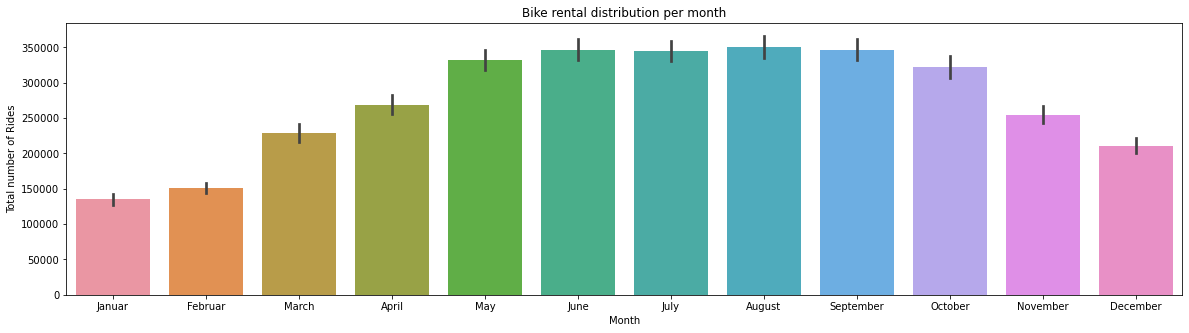

In [11]:
plt.figure(figsize=(20,5))
sns.barplot(x = "mnth", y = "cnt", data = df_h2011, estimator=sum)
plt.title("Bike rental distribution per month")
plt.xlabel("Month")
plt.ylabel("Total number of Rides")
plt.show()

In [12]:
temp = df_h2011.groupby(["hr","temp"]).sum()[["cnt","registered","casual"]]
temp.head(10)

cnt  registered  casual
hr       temp                          
00:00:00 -6.12   35          33       2
         -5.18    7           7       0
         -4.24    9           9       0
         -3.30   77          74       3
         -2.36   19          17       2
         -1.42   91          86       5
         -0.48  271         251      20
          0.46  117         107      10
          1.40  324         291      33
          2.34  415         373      42

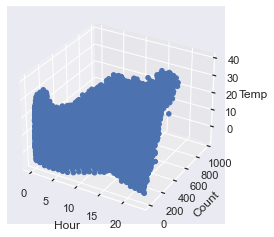

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df_h2011["dteday"].dt.hour
y = df_h2011["cnt"]
z = df_h2011["temp"]

ax.set_xlabel("Hour")
ax.set_ylabel("Count")
ax.set_zlabel("Temp")

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter(x, y, z, cmap=cmap, alpha=1)

plt.show()

In [14]:
df_d2011.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Januar,No,Saturday,No,Clear,7.98,7.76,81.0,10.72,331,654,985
1,2,2011-01-02,Winter,2011,Januar,No,Sunday,No,Clear,8.92,7.10,70.0,16.75,131,670,801
2,3,2011-01-03,Winter,2011,Januar,No,Monday,Yes,Clear,1.40,-3.46,44.0,16.75,120,1229,1349
3,4,2011-01-04,Winter,2011,Januar,No,Tuesday,Yes,Clear,1.40,-2.14,59.0,10.72,108,1454,1562
4,5,2011-01-05,Winter,2011,Januar,No,Wednesday,Yes,Clear,2.81,-0.82,44.0,12.73,82,1518,1600


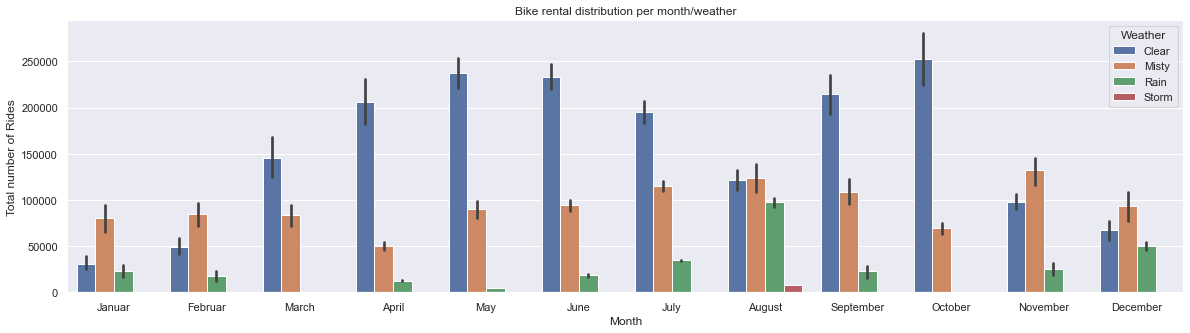

In [15]:
plt.figure(figsize=(20,5))
sns.barplot(x = "mnth", y = "cnt", data = df_d2011, hue="weathersit", estimator=sum) #black bar -konfidenzinterval
plt.title("Bike rental distribution per month/weather")
plt.xlabel("Month")
plt.ylabel("Total number of Rides")
plt.legend(title="Weather")
plt.show()